In [42]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier   # updated import

In [44]:
#pip install scikeras

In [64]:
fashion_train= pd.read_csv("fashion-mnist_train.csv")
fashion_test= pd.read_csv("fashion-mnist_test.csv")

In [65]:
fashion_train.shape

(60000, 785)

In [68]:
X_train_fashion = fashion_train.drop('label', axis=1).values
y_train_fashion = fashion_train['label'].values
X_test_fashion = fashion_test.drop('label', axis=1).values
y_test_fashion = fashion_test['label'].values

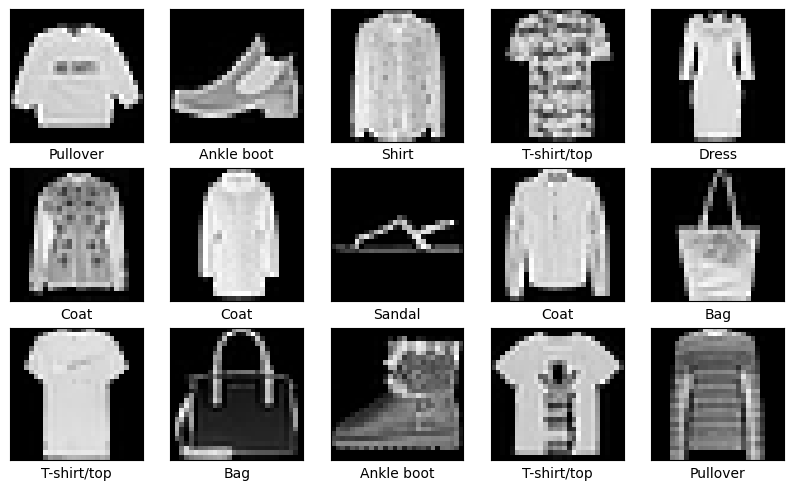

In [70]:
#Reshaping the dataset
X_train_fashion = X_train_fashion.reshape(-1, 784).astype("float32") / 255.0
X_test_fashion = X_test_fashion.reshape(-1, 784).astype("float32") / 255.0

#Name of the clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [72]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [74]:
# Creating base neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),    
    Dropout(0.3),
    BatchNormalization(),
    Dense(24, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(24, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(10, activation='softmax'),
])

# Compiling the model
model.compile(
    loss="categorical_crossentropy",   # fixed typo earlier
    optimizer="adam",
    metrics=['accuracy']
)

#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30, validation_data=(X_test_fashion,y_test_fashion))

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6299 - loss: 1.0783 - val_accuracy: 0.8245 - val_loss: 0.5306
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7517 - loss: 0.7295 - val_accuracy: 0.8368 - val_loss: 0.4663
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7746 - loss: 0.6689 - val_accuracy: 0.8499 - val_loss: 0.4361
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7843 - loss: 0.6330 - val_accuracy: 0.8478 - val_loss: 0.4347
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7900 - loss: 0.6135 - val_accuracy: 0.8529 - val_loss: 0.4154
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7962 - loss: 0.6001 - val_accuracy: 0.8430 - val_loss: 0.4336
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8040 - loss: 0.5839 - val_accuracy: 0.8514 - val_loss: 0.4068
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8054 - loss: 0.5812 - val_accuracy: 0.

In [60]:
print(X_train_fashion.shape)   # (60000, 784) after reshaping/normalizing
print(y_train_fashion.shape)   # (60000, 10) after one-hot encoding

print(X_test_fashion.shape)    # (10000, 784)
print(y_test_fashion.shape)    # (10000, 10)

(60000, 784)
(60000, 10)
(10000, 784)
(60000, 10)


In [78]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3726


In [80]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8689


In [84]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


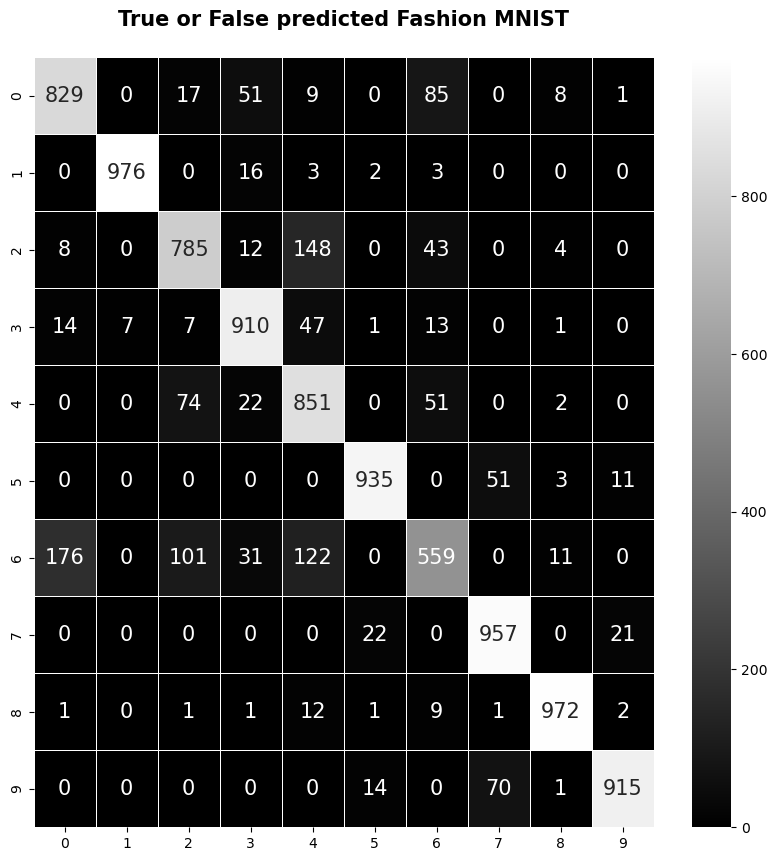

In [90]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.71      0.85      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.73      0.56      0.63      1000
           7       0.89      0.96      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [94]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


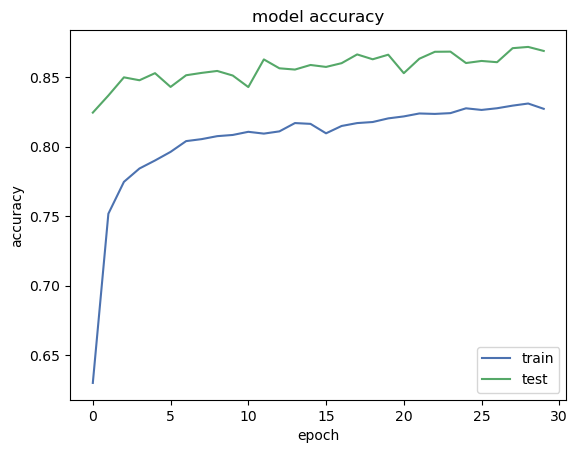

In [96]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

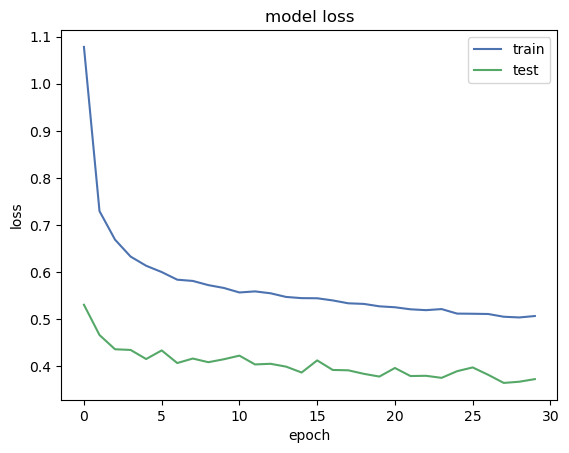

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [102]:
# Pick the first test sample
y_predict = model.predict(X_test_fashion[0].reshape(1, -1))   # reshape because model expects 2D
y_predict = np.argmax(y_predict, axis=1)  # get the class with highest probability

# Get the true label
y_test_digit_eval = np.argmax(y_test_fashion[0])  

print("Predicted:", y_predict)
print("Actual:", y_test_digit_eval)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted: [0]
Actual: 0


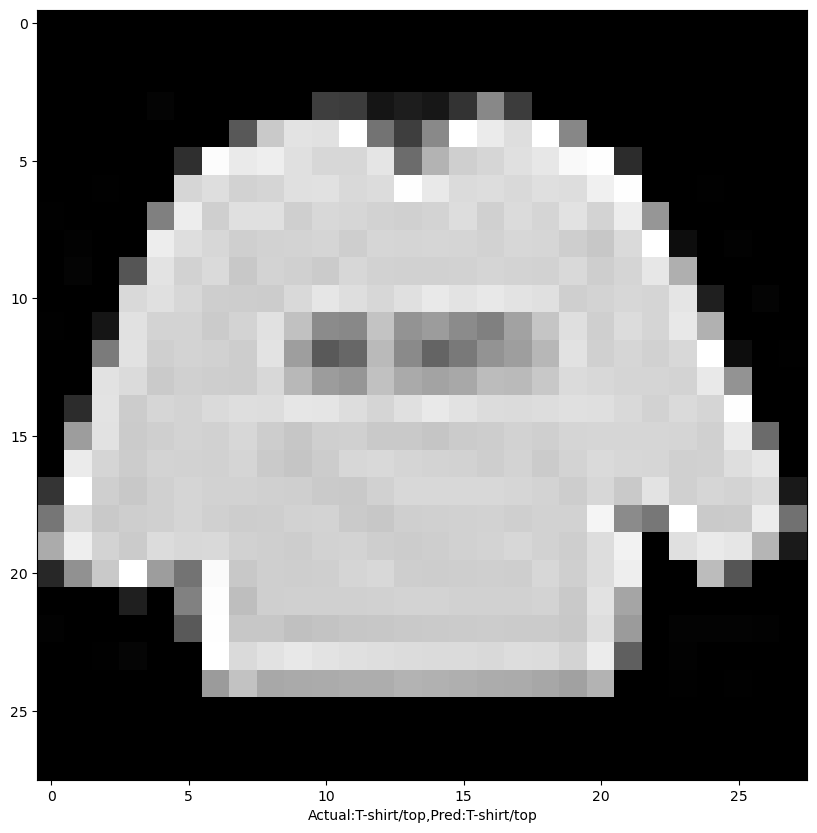

In [104]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()